In [1]:
import numpy as np
import pandas as pd
#from sklearn import datasets
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn import svm
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
#from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import cross_val_score

In [2]:
#Deases=pd.read_csv("deases.csv")
Train=pd.read_csv("Training_now.csv")
Test=pd.read_csv("Testing.csv")
dis=Train["Prognosis"]
dis1=Test["Prognosis"]

In [3]:
Train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
259    False
260    False
261    False
262    False
263    False
Length: 264, dtype: bool

In [4]:
Train.duplicated().sum()

0

In [5]:
dis.unique()

array(['AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis',
       'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox',
       'Chronic cholestasis', 'Common Cold', 'Covid', 'Dengue',
       'Diabetes ', 'Dimorphic hemorrhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D',
       'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthritis', 'Paralysis (brain hemorrhage)',
       'Paroxysmal Positional Vertigo', 'Peptic ulcer disease',
       'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid',
       'Urinary tract infection', 'Varicose veins'], dtype=object)

In [6]:
Test.loc[20].values

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 'Hepatitis B'], dtype=object)

array([[<AxesSubplot:title={'center':'Abdominal Pain'}>,
        <AxesSubplot:title={'center':'Abnormal Menstruation'}>,
        <AxesSubplot:title={'center':'Acidity'}>,
        <AxesSubplot:title={'center':'Acute Liver Failure'}>,
        <AxesSubplot:title={'center':'Altered Sensorium'}>,
        <AxesSubplot:title={'center':'Anxiety'}>,
        <AxesSubplot:title={'center':'Back Pain'}>,
        <AxesSubplot:title={'center':'Belly Pain'}>,
        <AxesSubplot:title={'center':'Blackheads'}>,
        <AxesSubplot:title={'center':'Bladder Discomfort'}>,
        <AxesSubplot:title={'center':'Blister'}>,
        <AxesSubplot:title={'center':'Blood In Sputum'}>],
       [<AxesSubplot:title={'center':'Bloody Stool'}>,
        <AxesSubplot:title={'center':'Blurred And Distorted Vision'}>,
        <AxesSubplot:title={'center':'Breathlessness'}>,
        <AxesSubplot:title={'center':'Brittle Nails'}>,
        <AxesSubplot:title={'center':'Bruising'}>,
        <AxesSubplot:title={'center':'B

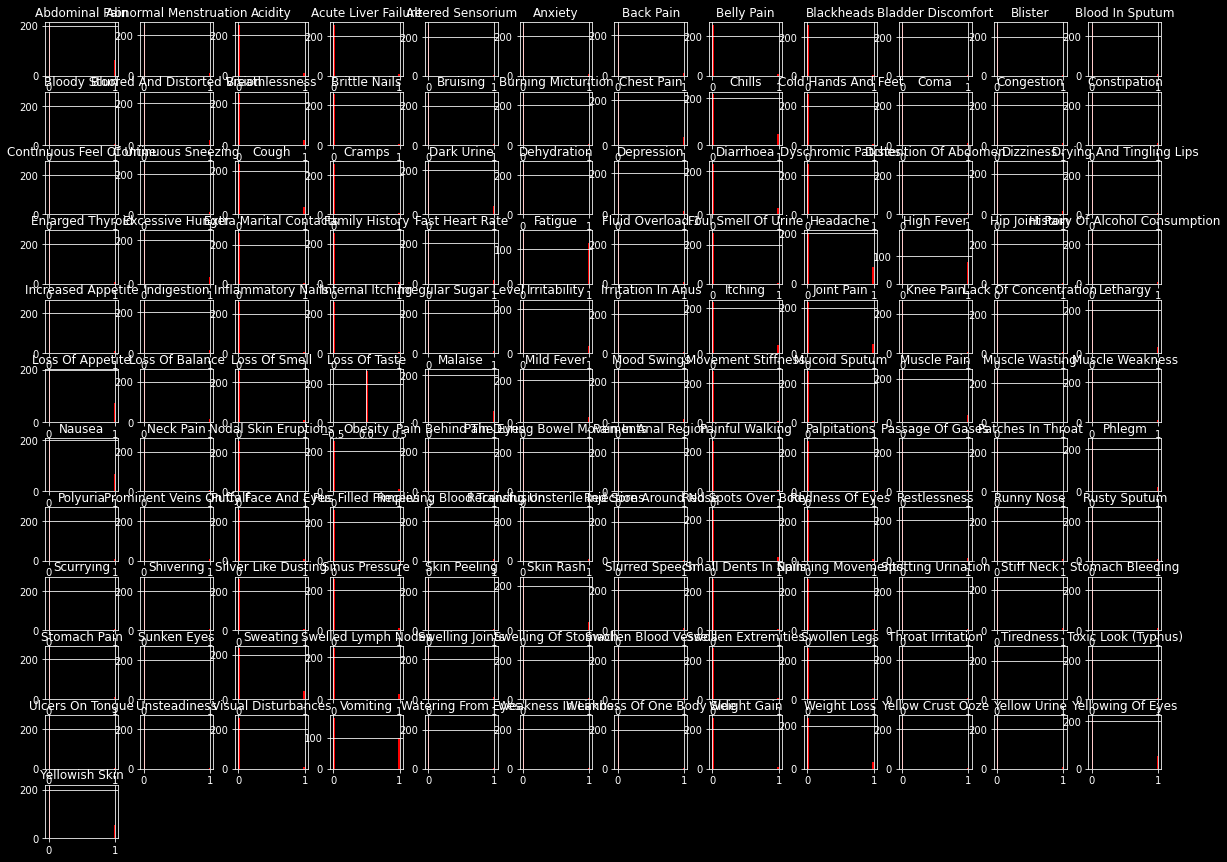

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
style.use("dark_background")
Train.hist(bins=50,figsize=(20,15),color="r")

In [8]:
Label= LabelEncoder()
dis[:]=Label.fit_transform(dis[:])
dis1[:]=Label.fit_transform(dis1[:])


C:\Users\PC\AppData\Local\Temp\ipykernel_4948\3400900243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis[:]=Label.fit_transform(dis[:])
C:\Users\PC\AppData\Local\Temp\ipykernel_4948\3400900243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis1[:]=Label.fit_transform(dis1[:])


In [9]:
dis.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41], dtype=object)

In [10]:
dis.head(40)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    3
16    3
17    3
18    3
19    4
20    4
21    4
22    4
23    4
24    5
25    5
26    5
27    5
28    5
29    5
30    6
31    6
32    6
33    6
34    6
35    7
36    7
37    7
38    7
39    7
Name: Prognosis, dtype: object

In [11]:
dis.tail(40)

224    36
225    36
226    36
227    36
228    36
229    36
230    36
231    37
232    37
233    37
234    37
235    37
236    37
237    38
238    38
239    38
240    38
241    38
242    38
243    38
244    38
245    39
246    39
247    39
248    39
249    39
250    39
251    39
252    39
253    40
254    40
255    40
256    40
257    41
258    41
259    41
260    41
261    41
262    41
263    41
Name: Prognosis, dtype: object

In [12]:
Train

,Abdominal Pain,Abnormal Menstruation,Acidity,Acute Liver Failure,Altered Sensorium,Anxiety,Back Pain,Belly Pain,Blackheads,Bladder Discomfort,...,Watering From Eyes,Weakness In Limbs,Weakness Of One Body Side,Weight Gain,Weight Loss,Yellow Crust Ooze,Yellow Urine,Yellowing Of Eyes,Yellowish Skin,Prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41


In [13]:
#train_set,test_set=train_test_split(Deases,test_size=0.2,random_state=42)

In [14]:
Deases=Train.drop("Prognosis",axis=1)


In [15]:
Deases

,Abdominal Pain,Abnormal Menstruation,Acidity,Acute Liver Failure,Altered Sensorium,Anxiety,Back Pain,Belly Pain,Blackheads,Bladder Discomfort,...,Vomiting,Watering From Eyes,Weakness In Limbs,Weakness Of One Body Side,Weight Gain,Weight Loss,Yellow Crust Ooze,Yellow Urine,Yellowing Of Eyes,Yellowish Skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Deases_label=Train["Prognosis"].astype(int)

In [17]:
Deases_label

0       0
1       0
2       0
3       0
4       1
       ..
259    41
260    41
261    41
262    41
263    41
Name: Prognosis, Length: 264, dtype: int32

In [18]:
#clf=RandomForestClassifier(n_estimators=15)
#clf=KNeighborsClassifier()
#clf=LogisticRegression()
#clf=svm.SVC()
#clf = DecisionTreeClassifier()
#clf=GaussianNB()
clf=ComplementNB()

In [19]:
clf.fit(Deases,Deases_label)

ComplementNB()

In [20]:
Deases.head()

,Abdominal Pain,Abnormal Menstruation,Acidity,Acute Liver Failure,Altered Sensorium,Anxiety,Back Pain,Belly Pain,Blackheads,Bladder Discomfort,...,Vomiting,Watering From Eyes,Weakness In Limbs,Weakness Of One Body Side,Weight Gain,Weight Loss,Yellow Crust Ooze,Yellow Urine,Yellowing Of Eyes,Yellowish Skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
some_data=Deases.iloc[:5]
some_labels=Deases_label.iloc[:5]
some_data
#prepared_data=my_pipeline.transform(some_data)

,Abdominal Pain,Abnormal Menstruation,Acidity,Acute Liver Failure,Altered Sensorium,Anxiety,Back Pain,Belly Pain,Blackheads,Bladder Discomfort,...,Vomiting,Watering From Eyes,Weakness In Limbs,Weakness Of One Body Side,Weight Gain,Weight Loss,Yellow Crust Ooze,Yellow Urine,Yellowing Of Eyes,Yellowish Skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
clf.predict(some_data)

array([0, 0, 0, 0, 1])

In [23]:
list(some_labels)

[0, 0, 0, 0, 1]

In [24]:
#prediction=clf.predict(Deases)

## Creating joblib

In [25]:
from joblib import dump,load
dump(clf,"Prediction_Deases_final_2.joblib")

['Prediction_Deases_final_2.joblib']

In [26]:
x_test=Test.drop("Prognosis",axis=1)
y_test=Test["Prognosis"].copy().astype(int)

In [27]:
x_test.loc[2].values

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1], dtype=int64)

In [28]:
x_prepared_data=x_test
final_prediction=clf.predict(x_prepared_data)
final_mse=mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
final_rmse

2.7774602993176543

In [29]:
x_prepared_data

,Abdominal Pain,Abnormal Menstruation,Acidity,Acute Liver Failure,Altered Sensorium,Anxiety,Back Pain,Belly Pain,Blackheads,Bladder Discomfort,...,Vomiting,Watering From Eyes,Weakness In Limbs,Weakness Of One Body Side,Weight Gain,Weight Loss,Yellow Crust Ooze,Yellow Urine,Yellowing Of Eyes,Yellowish Skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
some_data1=x_test.iloc[:5]
some_labels1=y_test.iloc[:5]
prepared_data1=some_data1

In [31]:
prepared_data1

,Abdominal Pain,Abnormal Menstruation,Acidity,Acute Liver Failure,Altered Sensorium,Anxiety,Back Pain,Belly Pain,Blackheads,Bladder Discomfort,...,Vomiting,Watering From Eyes,Weakness In Limbs,Weakness Of One Body Side,Weight Gain,Weight Loss,Yellow Crust Ooze,Yellow Urine,Yellowing Of Eyes,Yellowish Skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
print(final_prediction,list(y_test))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 36 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


## Testing the model

In [33]:
from joblib import dump,load
model=load("Prediction_Deases_final_2.joblib")

In [34]:
features=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0]])
d=clf.predict(features)
Predicted_Deases=Label.inverse_transform(d)

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


In [35]:
Predicted_Deases

array(['Dimorphic hemorrhoids(piles)'], dtype=object)

In [36]:
clf.score(x_test,y_test)

0.9761904761904762

In [37]:
clf.score(Deases,Deases_label)

0.9734848484848485

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_prediction=cross_val_predict(clf,Deases,Deases_label,cv=3)
cm=confusion_matrix(Deases_label,y_prediction)
cm

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


array([[4, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 7, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 8, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 7]], dtype=int64)

<AxesSubplot:>

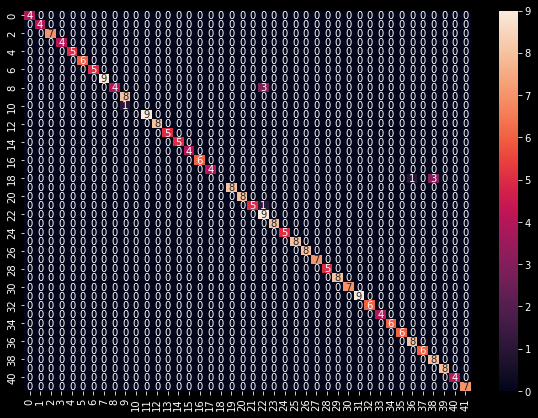

In [39]:
import seaborn as sns
plt.figure(figsize=(10,7) )
sns.heatmap(cm,annot=True)

In [40]:
y_prediction1=clf.predict(x_test)
cm1=confusion_matrix(y_test,y_prediction1)
cm1

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

<AxesSubplot:>

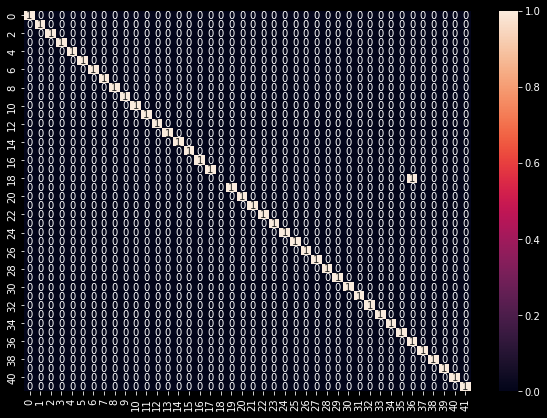

In [41]:
plt.figure(figsize=(10,7) )
sns.heatmap(cm1,annot=True)